# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()
# Fetch current ETH price
# YOUR CODE HERE!]
eth_response
btc_price = btc_response['data']['1']['quotes']['USD']['price']
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $14307.44
The current value of your 5.3 ETH is $1952.84


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")
type(api_key)
# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
    api_key,
    secret_key,
    api_version = "v2"
)

In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
#today = dt.today()
dt_today = datetime.datetime.today().strftime("%Y-%m-%d")

today = pd.Timestamp(dt_today, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

# YOUR CODE HERE!
df_stocks = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_stocks.head()

AGG                                      SPY  \
                            open    high     low   close   volume    open   
2020-10-20 00:00:00-04:00  117.7  117.71  117.58  117.64  3624855  343.46   

                                                             
                             high     low   close    volume  
2020-10-20 00:00:00-04:00  346.88  342.64  343.34  48206853

In [10]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_closing = df_stocks["AGG"]["close"][0]
spy_closing = df_stocks["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_closing}")
print(f"Current SPY closing price: ${spy_closing}")

Current AGG closing price: $117.64
Current SPY closing price: $343.34


In [11]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_closing * my_agg
my_spy_value = spy_closing * my_spy
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17167.00
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [12]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
savings = {"amount": [(my_eth_value + my_btc_value),
                     (my_agg_value + my_spy_value)]
}

df_savings = pd.DataFrame(data = savings, index = ["crypto","shares"])
print(type(df_savings))

print(df_savings)

#df_savings.set_index(["crypto","shares"])
# Display savings DataFrame
#print(df_savings["amount"])

<class 'pandas.core.frame.DataFrame'>
           amount
crypto  16260.282
shares  40695.000


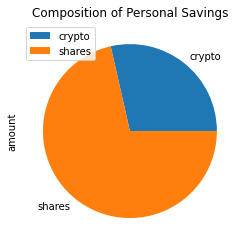

In [13]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot(kind="pie", y = "amount", title = "Composition of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings =sum(df_savings["amount"])
print(total_savings)
# Validate saving health
# YOUR CODE HERE!
savings_health = (total_savings / emergency_fund)
if savings_health >1:
    print(f'Congratulations!  You have enough money in your emergency fund')
else:
    print(f'Your current ratio should be at least 1 to ensure you have enough '
        'in reserve.  Your ratio is: {savings_health}')

56955.282
Congratulations!  You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
num_days = 365*5 +1 #total days back, plus 1 for leap year

dt_today = datetime.datetime.today().date()
dt_less_5yrs = dt_today - datetime.timedelta(days = (365*5))
dt_today = str(dt_today)
dt_less_5yrs = str(dt_less_5yrs)

#print(dt_start)
start_date = pd.Timestamp(dt_less_5yrs, tz='America/New_York').isoformat()
end_date = pd.Timestamp(dt_today, tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244  202.98   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796  206.97   

                                                              
                             high     low   close     volume  
2015-10-22 00:00:00-04:00  205.51  202.81  205.22  121670959  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 100
ntd = 252
yrs = 30
num_days = ntd * yrs


# Print the simulation input data
MC_sim = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = num_days
)



AGG                                   \
                             open    high     low   close   volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [25]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_sim.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.995561  0.987758  0.990686  1.001882  0.998287  1.018900  1.001502   
2     0.991120  0.984653  0.995753  1.004971  0.997665  1.022941  0.996471   
3     0.990014  0.980382  0.999530  0.995315  1.004466  1.016259  0.993707   
4     0.977156  0.976769  0.999255  1.003990  1.011738  1.018118  0.986506   
...        ...       ...       ...       ...       ...       ...       ...   
7556  2.539010  5.025862  9.661222  4.156093  2.636713  3.382023  8.034843   
7557  2.544680  5.032956  9.562162  4.120545  2.613756  3.366325  8.112146   
7558  2.540260  5.008297  9.587071  4.118618  2.629671  3.337529  8.156013   
7559  2.494780  5.015076  9.545272  4.107399  2.626995  3.384952  8.177077   
7560  2.525051  5.089004  9.607086  4.094985  2.602824  3.365709  8.135935   

            7         8          9   ...        90        91        92  \
0     1.000000  1.000000   1.000000  ...  1.000000  1.000000  1.000000   
1     0.997754  1.005870   0.996309  ...  1.007175  0.998628  0.999150   
2     0.998670  0.994283   0.994625  ...  1.017106  1.006837  1.005086   
3     0.985306  0.990817   0.994359  ...  1.019549  1.011949  1.000460   
4     0.987692  0.988026   0.984011  ...  1.018816  1.010614  1.011656   
...        ...       ...        ...  ...       ...       ...       ...   
7556  8.459513  5.313381  12.036654  ...  7.016139  3.303819  5.932056   
7557  8.461741  5.281878  11.951111  ...  6.996607  3.308665  5.911457   
7558  8.470006  5.302476  12.017701  ...  6.984260  3.310335  5.935747   
7559  8.454523  5.253935  12.071881  ...  6.940777  3.339622  6.030289   
7560  8.403436  5.252427  11.987880  ...  6.939784  3.360482  6.011709   

            93        94         95         96        97        98         99  
0     1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   1.000000  
1     1.002394  0.992037   0.989628   0.988103  0.998688  1.006219   1.004795  
2     0.998200  1.002856   0.998581   0.983253  1.012267  1.009172   1.004448  
3     0.993372  0.998245   1.002883   0.981731  1.000130  1.011507   1.016309  
4     1.001479  0.994551   1.007595   0.990308  1.007140  1.014374   1.017931  
...        ...       ...        ...        ...       ...       ...        ...  
7556  5.630862  8.884790  15.228011  13.449346  5.241654  8.797556  19.866449  
7557  5.626603  8.868734  15.212554  13.546696  5.200867  8.865432  20.038923  
7558  5.605937  8.921510  15.401487  13.476822  5.292250  8.865881  20.098532  
7559  5.654170  8.913184  15.450234  13.283930  5.291514  8.833291  20.078649  
7560  5.589287  8.833650  15.400123  13.371960  5.264422  8.793648  20.254967  

[7561 rows x 100 columns]

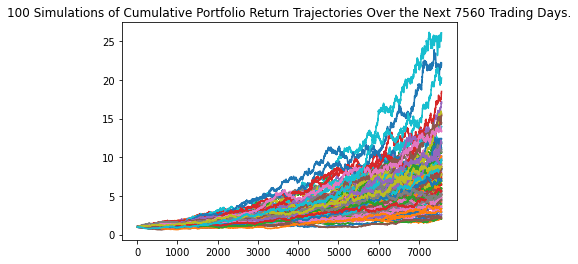

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_sim.plot_simulation()

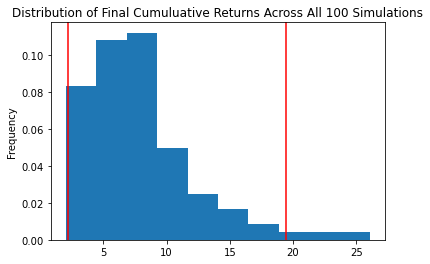

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_sim.plot_distribution()


### Retirement Analysis

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_sim.summarize_cumulative_return()
# Print summary statistics
print(stats)
# YOUR CODE HERE!

count           100.000000
mean              7.863857
std               4.410013
min               2.031397
25%               4.861409
50%               7.086095
75%               9.631523
max              26.101613
95% CI Lower      2.223763
95% CI Upper     19.427833
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [32]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats[8] * initial_investment,2)
ci_upper = round(stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44475.26 and $388556.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(stats[8] * initial_investment,2)
ci_upper = round(stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $66712.89 and $582834.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
yrs = 5
num_days = ntd * yrs #total days back, plus 1 for leap year

dt_today = datetime.datetime.today().date()
dt_plus_5yrs = dt_today + datetime.timedelta(days = num_days)

start_date = pd.Timestamp(str(dt_today), tz= "America/New_York").isoformat()
end_date = pd.Timestamp(str(dt_plus_5yrs), tz='America/New_York').isoformat()

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = num_days
)


MC_five_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [39]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.003056  1.007666  1.002180  1.009563  0.991921  1.019700  1.003298   
2     0.997258  1.002188  0.998173  1.007229  0.992221  1.025317  1.021023   
3     0.998345  1.004152  0.996609  1.014320  0.992507  1.023574  1.018686   
4     1.000812  1.012515  0.994361  1.006523  0.999487  1.029234  1.016889   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.468299  1.293817  1.628480  1.082237  1.862907  1.562998  2.150318   
1257  1.462356  1.292386  1.618505  1.074793  1.882154  1.571588  2.141852   
1258  1.443237  1.278941  1.610981  1.073120  1.894300  1.586934  2.139203   
1259  1.442060  1.276060  1.618826  1.073005  1.893290  1.598361  2.123034   
1260  1.452883  1.265404  1.635272  1.073539  1.905432  1.608433  2.110203   

            7         8         9   ...        90        91        92  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.991473  1.002568  0.992303  ...  0.997414  1.006968  1.000315   
2     0.986408  1.002147  0.993262  ...  0.998404  1.009594  0.989398   
3     0.980916  1.005051  0.992324  ...  0.988083  1.008706  0.990547   
4     0.979680  1.000770  0.997352  ...  0.980114  1.016753  0.988039   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.412504  2.522323  1.953217  ...  1.344159  1.120665  1.548917   
1257  1.419228  2.523597  1.943753  ...  1.348742  1.129237  1.568384   
1258  1.414709  2.513523  1.952848  ...  1.354574  1.139942  1.569370   
1259  1.417408  2.547186  1.972444  ...  1.348945  1.151017  1.584621   
1260  1.419930  2.561502  1.973328  ...  1.349035  1.152124  1.597179   

            93        94        95        96        97        98        99  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006108  1.000405  1.009363  0.993705  0.995488  1.007101  0.999609  
2     1.000730  0.991377  1.003861  0.996029  0.989410  0.990121  1.005717  
3     0.997850  0.986110  1.008891  1.006980  0.985744  0.987132  1.004155  
4     0.993722  0.980073  1.006042  1.006637  0.979899  0.990347  1.014891  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.977425  1.447628  1.216815  1.396847  1.924266  1.299176  1.492215  
1257  0.979220  1.452802  1.205948  1.398901  1.925729  1.304961  1.475500  
1258  0.976267  1.445219  1.194970  1.404067  1.927436  1.313029  1.474504  
1259  0.978554  1.444493  1.203362  1.398192  1.947119  1.313868  1.480961  
1260  0.973763  1.442417  1.203986  1.407291  1.941353  1.301473  1.483992  

[1261 rows x 100 columns]

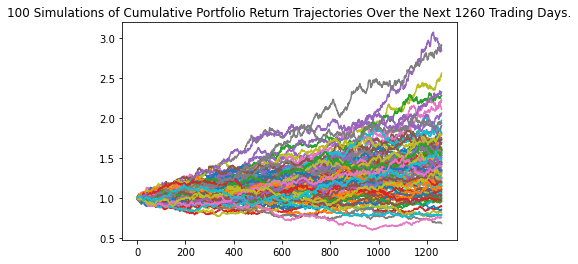

In [40]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five_year.plot_simulation()

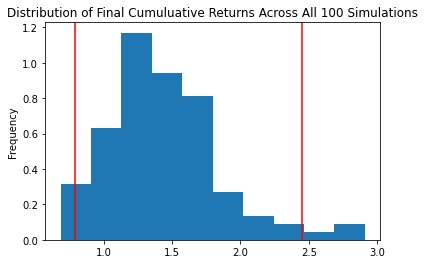

In [41]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_five_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           100.000000
mean              1.440314
std               0.410899
min               0.685451
25%               1.176412
50%               1.423288
75%               1.605686
max               2.909380
95% CI Lower      0.793623
95% CI Upper      2.449928
Name: 1260, dtype: float64


In [43]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(stats[8] * initial_investment,2)
ci_upper_five = round(stats[9] * initial_investment,2) 
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $23808.7 and $73497.85


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
num_days = (365 * 10) + 2
dt_today = datetime.datetime.today().date()
dt_plus_10yrs = dt_today + datetime.timedelta(days = num_days)


start_date = pd.Timestamp(str(dt_today),tz = "America/New_York").isoformat()
end_date = pd.Timestamp(str(dt_plus_10yrs),tz = "America/New_York").isoformat()


MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    num_trading_days = num_days,
    num_simulation = num_sims
)

MC_ten_year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-22 00:00:00-04:00  109.90  110.05  109.83  109.94  1817244   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-22 00:00:00-04:00          NaN  202.98  205.51  202.81  205.22   
2015-10-23 00:00:00-04:00    -0.001819  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   

                                                   
                              volume daily_return  
2015-10-22 00:00:00-04:00  121670959          NaN  
2015-10-23 00:00:00-04:00  103135843     0.011159  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


0         1         2         3         4         5         6   \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998546  0.999043  0.995928  0.998136  1.004577  1.007043  0.985545   
2     0.989978  1.004686  0.991025  0.994067  1.002381  1.002657  0.987166   
3     0.994205  1.009470  0.987573  0.996895  1.006930  1.014373  0.981583   
4     0.993347  1.010351  0.979417  1.005214  1.011140  1.014787  0.979657   
...        ...       ...       ...       ...       ...       ...       ...   
3648  1.345752  2.247776  2.237842  1.187304  1.860844  3.099015  1.180994   
3649  1.349834  2.250425  2.257649  1.166622  1.858065  3.098975  1.184787   
3650  1.336667  2.256528  2.265966  1.158125  1.865468  3.093124  1.185928   
3651  1.330623  2.255409  2.258988  1.152397  1.860784  3.106090  1.184202   
3652  1.351354  2.248699  2.258947  1.155467  1.879629  3.101406  1.178864   

            7         8         9   ...        90        91        92  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003155  1.005103  1.008807  ...  0.989963  1.004130  0.986339   
2     0.997696  1.007058  1.015555  ...  0.983333  1.009542  0.965075   
3     0.988585  1.015728  1.015619  ...  0.984445  1.012487  0.968622   
4     0.985726  1.016609  1.010685  ...  0.988206  1.022693  0.973364   
...        ...       ...       ...  ...       ...       ...       ...   
3648  2.408546  2.171542  2.442611  ...  3.578654  1.587620  1.855083   
3649  2.415885  2.186080  2.433863  ...  3.551485  1.593974  1.858752   
3650  2.441533  2.200834  2.450600  ...  3.546207  1.604341  1.868479   
3651  2.449407  2.175469  2.449574  ...  3.499450  1.590157  1.880517   
3652  2.457523  2.186405  2.447189  ...  3.517636  1.576452  1.885284   

            93        94        95        96        97        98        99  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000997  1.002860  1.006378  1.012855  1.000181  1.013533  0.999139  
2     1.006016  0.999275  1.008660  1.016713  1.004900  1.017582  0.996816  
3     1.005854  0.997888  1.009618  1.017618  1.016291  1.009598  0.991416  
4     0.995101  0.994067  1.004322  1.015164  1.013696  1.025936  0.995965  
...        ...       ...       ...       ...       ...       ...       ...  
3648  2.851569  3.150297  2.712293  3.155326  3.805362  2.851108  1.920019  
3649  2.869513  3.181552  2.735377  3.182932  3.763717  2.870630  1.907313  
3650  2.872302  3.153507  2.734421  3.194220  3.761736  2.845665  1.882646  
3651  2.893429  3.153625  2.742407  3.213335  3.753581  2.838613  1.877832  
3652  2.917380  3.160264  2.693476  3.204804  3.735944  2.830826  1.890418  

[3653 rows x 100 columns]

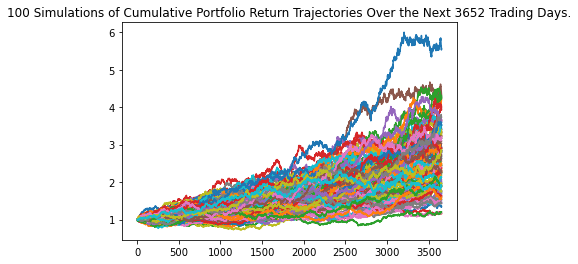

In [47]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_ten_year.plot_simulation()

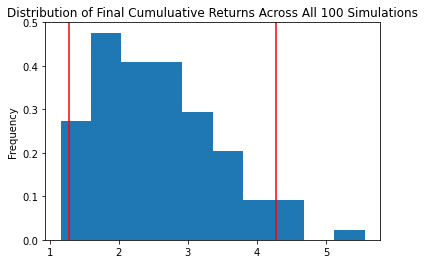

In [48]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_ten_year.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats = MC_ten_year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(stats)

count           100.000000
mean              2.594219
std               0.873086
min               1.155467
25%               1.890852
50%               2.459438
75%               3.207258
max               5.563376
95% CI Lower      1.271184
95% CI Upper      4.283171
Name: 3652, dtype: float64


In [50]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stats[8] * initial_investment,2)
ci_upper_ten = round(stats[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $38135.52 and $128495.12
